In [3]:
import imaging_behavior_functions
import odor_behavioral_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
import os
import mat73
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from scipy.stats import iqr
from PIL import Image
import cv2
from IPython.display import display, clear_output
import time
import seaborn as sns
from scipy.stats import iqr
from scipy.ndimage import gaussian_filter1d
import glob
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf
from scipy.stats import sem
from scipy.stats import circmean, circstd
from scipy import stats

In [4]:
base_path = "//research.files.med.harvard.edu/neurobio/wilsonlab/Jingxuan/processed/FR1_imaging/"
example_path_data = base_path+"20230719-4_FR1_GCAMP7f_odor_odor_apple_width30_fly2/data/"
example_path_results = base_path+"20230719-4_FR1_GCAMP7f_odor_odor_apple_width30_fly2/results/"
trial_num = 1
odor_threshold = 5
time_interval_threshold = 16  # Assuming time is in seconds or an equivalent unit
k = 8
window_size = 30

is_mat73, roi_df, dff_raw, kinematics_raw, preprocessed_vars_ds, preprocessed_vars_odor = imaging_behavior_functions.load_intermediate_mat(example_path_data,trial_num)
behav_df = imaging_behavior_functions.make_df_behavior(dff_raw, preprocessed_vars_ds, preprocessed_vars_odor,trial_num,ball_d = 9)
xPos, yPos = imaging_behavior_functions.reconstruct_path(behav_df, ball_d = 9)
roi_names, hdeltab_index, epg_index, fr1_index, hdeltab_sequence, epg_sequence, fr1_sequence = imaging_behavior_functions.get_roi_seq(roi_df)
dff_all_rois, dff_time = imaging_behavior_functions.load_dff_raw(is_mat73, dff_raw)
neural_df = imaging_behavior_functions.make_df_neural(dff_all_rois, dff_time, roi_names, hdeltab_index, epg_index, fr1_index, hdeltab_sequence, epg_sequence, fr1_sequence)
#behav_df, padded_result_df, smoothed_df = odor_behavioral_analysis.analysis_dfs(behav_df, time_interval_threshold, k, window_size)
combined_df = imaging_behavior_functions.combine_df(behav_df, neural_df)
#smoothed_df["translationalV_smoothed"] = np.sqrt(smoothed_df["fwV_smoothed"]**2+smoothed_df["sideV_smoothed"]**2)

In [5]:
selected_df = neural_df.filter(like='FR1_FB')
selected_df

,FR1_FB_0,FR1_FB_1,FR1_FB_2,FR1_FB_3,FR1_FB_4,FR1_FB_5,FR1_FB_6,FR1_FB_7,FR1_FB_8,FR1_FB_9,...,FR1_FB_12,FR1_FB_13,FR1_FB_14,FR1_FB_15,FR1_FB_16,FR1_FB_17,FR1_FB_18,FR1_FB_19,FR1_FB_20,FR1_FB_21
0,0.740298,1.039999,1.417494,1.845615,2.210711,2.256528,2.555366,2.392472,2.032957,2.027003,...,1.522391,0.730995,0.354655,0.247170,0.051551,0.192494,0.107480,0.187204,0.373490,0.112676
1,0.692050,1.062624,1.353895,1.793628,2.185951,2.232150,2.288423,2.269115,2.087727,1.730206,...,1.559605,0.759287,0.379847,0.262219,0.110054,0.222407,0.101468,0.160485,0.359428,0.112439
2,0.620568,0.943810,1.198428,1.698084,2.017442,2.131871,1.997264,2.105051,2.007947,1.533502,...,1.436630,0.752898,0.391131,0.241090,0.201970,0.248684,0.096336,0.149944,0.298646,0.123349
3,0.506043,0.692037,1.003912,1.555834,1.722077,1.916009,1.809969,1.968879,1.820466,1.639095,...,1.358925,0.859914,0.470802,0.299132,0.329898,0.261696,0.160906,0.209435,0.199036,0.126638
4,0.368492,0.522416,0.849829,1.348205,1.410769,1.635544,1.679082,1.943389,1.657514,1.784086,...,1.442711,1.099150,0.688860,0.487213,0.504908,0.274173,0.295525,0.322647,0.167782,0.107584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,1.283781,1.338055,0.762384,0.453338,0.561794,0.286750,0.185741,0.204857,0.002256,0.381334,...,0.574256,-0.020816,0.117972,0.175693,0.365945,0.643338,0.777405,0.879703,0.958368,0.989658
2493,1.220782,1.197923,0.769571,0.471711,0.556865,0.268999,0.204250,0.317480,0.094670,0.438686,...,0.617596,0.074530,0.071739,0.140450,0.373886,0.659168,0.778770,0.911086,0.992147,0.938921
2494,1.188876,0.971912,0.755671,0.514872,0.545086,0.281493,0.211998,0.344270,0.142124,0.323263,...,0.534371,0.069544,0.019432,0.109606,0.347731,0.631296,0.744228,0.882026,0.991743,0.911839
2495,1.159371,0.864085,0.719524,0.583247,0.502564,0.258884,0.162792,0.274379,0.137554,0.247673,...,0.423022,0.028093,0.053424,0.137408,0.306985,0.573605,0.692365,0.829537,0.986806,0.896622


### PVA calculation

In [12]:
def calculate_pva(activity_matrix):
    num_neurons, time_steps = activity_matrix.shape
    directions = np.linspace(0, 2*np.pi, num_neurons//2, endpoint=False)
    
    # Repeat directions for both halves of the neuron population
    directions = np.tile(directions, 2)
    
    # Calculate vector components for each neuron's activity
    x_components = np.cos(directions)[:, np.newaxis] * activity_matrix
    y_components = np.sin(directions)[:, np.newaxis] * activity_matrix
    
    # Sum components across neurons for each time step
    sum_x = np.sum(x_components, axis=0)
    sum_y = np.sum(y_components, axis=0)
    
    # Calculate PVA for each time step
    pva_phase = np.arctan2(sum_y, sum_x)  # Phase in radians
    pva_amplitude = np.sqrt(sum_x**2 + sum_y**2)  # Magnitude of the vector
    
    # Compute overall PVA estimate (mean across time steps)
    #mean_phase = np.mean(pva_phase)
    #mean_amplitude = np.mean(pva_amplitude)
    
    return pva_phase, pva_amplitude


#pva_phase, pva_amplitude = calculate_pva(np.transpose(roi_mtx))
#plt.plot(mean_phase)
#print(f"Mean PVA Phase: {mean_phase} radians")
#print(f"Mean PVA Amplitude: {mean_amplitude}")


In [16]:
#mean_epg = np.transpose(np.mean(roi_mtx, axis=1))


### Sinusoidal parametric fitting

,time,phase,baseline,amplitude,phase_error,baseline_error,amplitude_error
0,0.000000,2.094395,0.645629,1.832075,0.072020,0.094791,0.136133
1,0.240313,2.094395,0.606155,1.724625,0.080373,0.099534,0.142878
2,0.480626,2.094395,0.498464,1.573792,0.087052,0.098301,0.141007
3,0.720939,2.094395,0.436498,1.375275,0.093513,0.091824,0.131098
4,0.961252,2.393594,0.496366,1.194781,0.105941,0.089169,0.125632
...,...,...,...,...,...,...,...
2492,598.859955,0.000000,-0.267005,0.648450,0.170929,0.076735,0.106151
2493,599.100268,0.000000,-0.262852,0.614716,0.179981,0.076589,0.105938
2494,599.340581,0.000000,-0.318483,0.621684,0.171480,0.073801,0.102089
2495,599.580894,0.000000,-0.363899,0.614107,0.156933,0.066721,0.092302


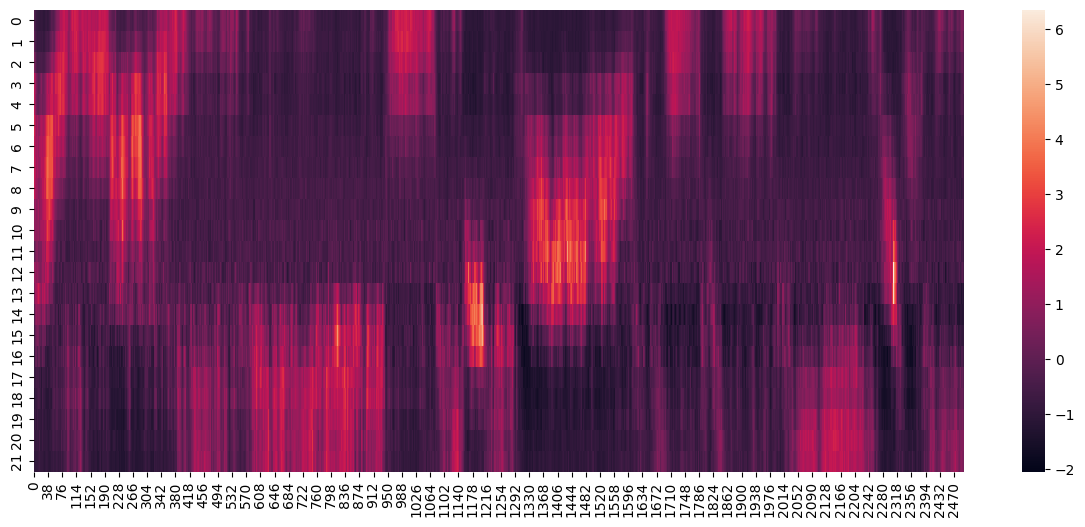

In [6]:
scaler = StandardScaler()
roi_mtx = scaler.fit_transform(selected_df)
plt.figure(figsize=(15, 6))
sns.heatmap(np.transpose(roi_mtx))
param_df = imaging_behavior_functions.fit_sinusoid(neural_df,roi_mtx)
param_df

In [27]:


def tuning_curve_1d(behavior_variable, neural_activity, neurons_to_plot, num_bins, ax=None):
    """
    Plot tuning curves on the given matplotlib Axes.

    Parameters:
    - behavior_variable: array-like, the behavioral variable to bin.
    - neural_activity: 2D array-like, neural activity data with shape (neurons, observations).
    - neurons_to_plot: list of int, indices of neurons to plot.
    - num_bins: int, number of bins to divide the behavior variable into.
    - ax: matplotlib.axes.Axes, the axes object to plot on. If None, a new figure is created.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Bin the behavioral variable
    bins = np.linspace(np.min(behavior_variable), np.max(behavior_variable), num_bins+1)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot tuning curves with SEM for selected neurons
    for neuron_index in neurons_to_plot:
        binned_activity = np.empty(num_bins)
        binned_sem = np.empty(num_bins)
        
        for i in range(num_bins):
            indices = np.where((behavior_variable >= bins[i]) & (behavior_variable < bins[i+1]))[0]
            bin_data = neural_activity[neuron_index, indices]
            binned_activity[i] = np.mean(bin_data)
            binned_sem[i] = sem(bin_data)

        ax.plot(bin_centers, binned_activity, label=f'Neuron {neuron_index}')
        ax.fill_between(bin_centers, binned_activity - binned_sem, binned_activity + binned_sem, alpha=0.3)

    # Setting labels and title
    ax.set_xlabel(behavior_variable.name)
    ax.set_ylabel('Average Neural Activity')
    ax.legend()
    ax.set_title('Neural Activity Tuning Curves with SEM')

# Example usage:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
# for i, ax in enumerate(axs):
#     tuning_curve_1d(behavior_variable, neural_activity, [i], 10, ax=ax)
# plt.show()



def filter_based_on_histogram(behavior_variable, min_freq_threshold):
    """
    Filters the behavioral variable data to remove points distant from the main mode,
    isolated by at least two consecutive bins with very low frequency. Automatically adjusts
    bins based on the Freedman-Diaconis rule.
    
    Parameters:
    - behavior_variable: Pandas Series, the behavioral variable data.
    - min_freq_threshold: The minimum frequency (as a proportion of total) to consider a bin as non-negligible.
    
    Returns:
    - Pandas Series, filtered behavioral variable data.
    """
    # Calculate bin width using the Freedman-Diaconis rule
    #IQR = np.subtract(*np.percentile(behavior_variable, [75, 25]))
    #n = len(behavior_variable)
    bin_width = 1
    range_ = np.max(behavior_variable) - np.min(behavior_variable)
    bins = int(np.round(range_ / bin_width))
    print(bins)
    # Compute the histogram with the calculated number of bins
    counts, bin_edges = np.histogram(behavior_variable, bins=bins)
    #total_points = n
    #freqs = counts / total_points  # Frequency of each bin
    
    # Identify bins below the frequency threshold
    low_freq_bins_mask = counts < min_freq_threshold
    
    # Find indices where two consecutive bins are below the threshold
    two_consecutive_low_bins = np.where(np.convolve(low_freq_bins_mask, [1,1], mode='valid') == 2)[0]
    
    if two_consecutive_low_bins.size == 0:
        return behavior_variable  # No such consecutive low bins, return original series
    
    # Determine cutoffs
    mode_bin_index = np.argmax(counts)
    lower_cutoff_bins = two_consecutive_low_bins[two_consecutive_low_bins < mode_bin_index]
    upper_cutoff_bins = two_consecutive_low_bins[two_consecutive_low_bins > mode_bin_index]
    lower_cutoff = bin_edges[0] if lower_cutoff_bins.size == 0 else bin_edges[lower_cutoff_bins.max() + 2]  # +2 to include the low bin
    upper_cutoff = bin_edges[-1] if upper_cutoff_bins.size == 0 else bin_edges[upper_cutoff_bins.min()]
    
    # Filter the behavioral variable
    filtered_variable = behavior_variable[(behavior_variable >= lower_cutoff) & (behavior_variable <= upper_cutoff)]
    
    return filtered_variable
# Example usage:
#tuning_curve_1d(behavior_variable, neural_activity,neurons_to_plot,num_bins)

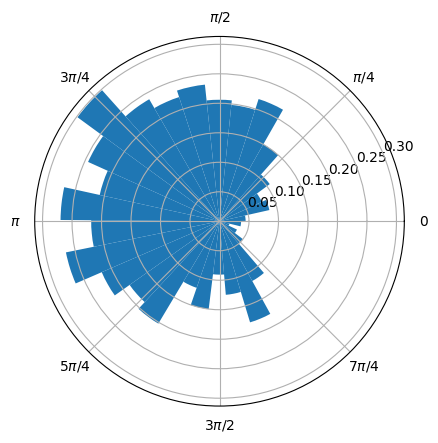

In [8]:

# Creating a circular histogram
def calc_circu_stats(circu_var,num_bins):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    # Histogram with 30 bins
    n, bins, patches = ax.hist(circu_var, bins=num_bins, density=True)

    # Set the circumference labels
    ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
    ax.set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$', '$5\pi/4$', '$3\pi/2$', '$7\pi/4$'])

    # Display the plot
    plt.show()



    # Circular mean using scipy.stats.circmean for accuracy
    mean_angle = circmean(circu_var, high=2*np.pi)

    # Circular median: Sort the angles and find the middle value
    sorted_angles = np.sort(circu_var)
    median_angle = np.pi if len(sorted_angles) % 2 == 0 else sorted_angles[len(sorted_angles) // 2]

    # Circular mode: Use histogram bins, find the bin with the highest frequency
    n, bins = np.histogram(circu_var, bins=num_bins, range=(0, 2*np.pi))
    max_bin_index = np.argmax(n)
    mode_angle = (bins[max_bin_index] + bins[max_bin_index + 1]) / 2

    return mean_angle, median_angle, mode_angle
mean_angle, median_angle, mode_angle = calc_circu_stats(behav_df.heading,30)

37
200
42
6


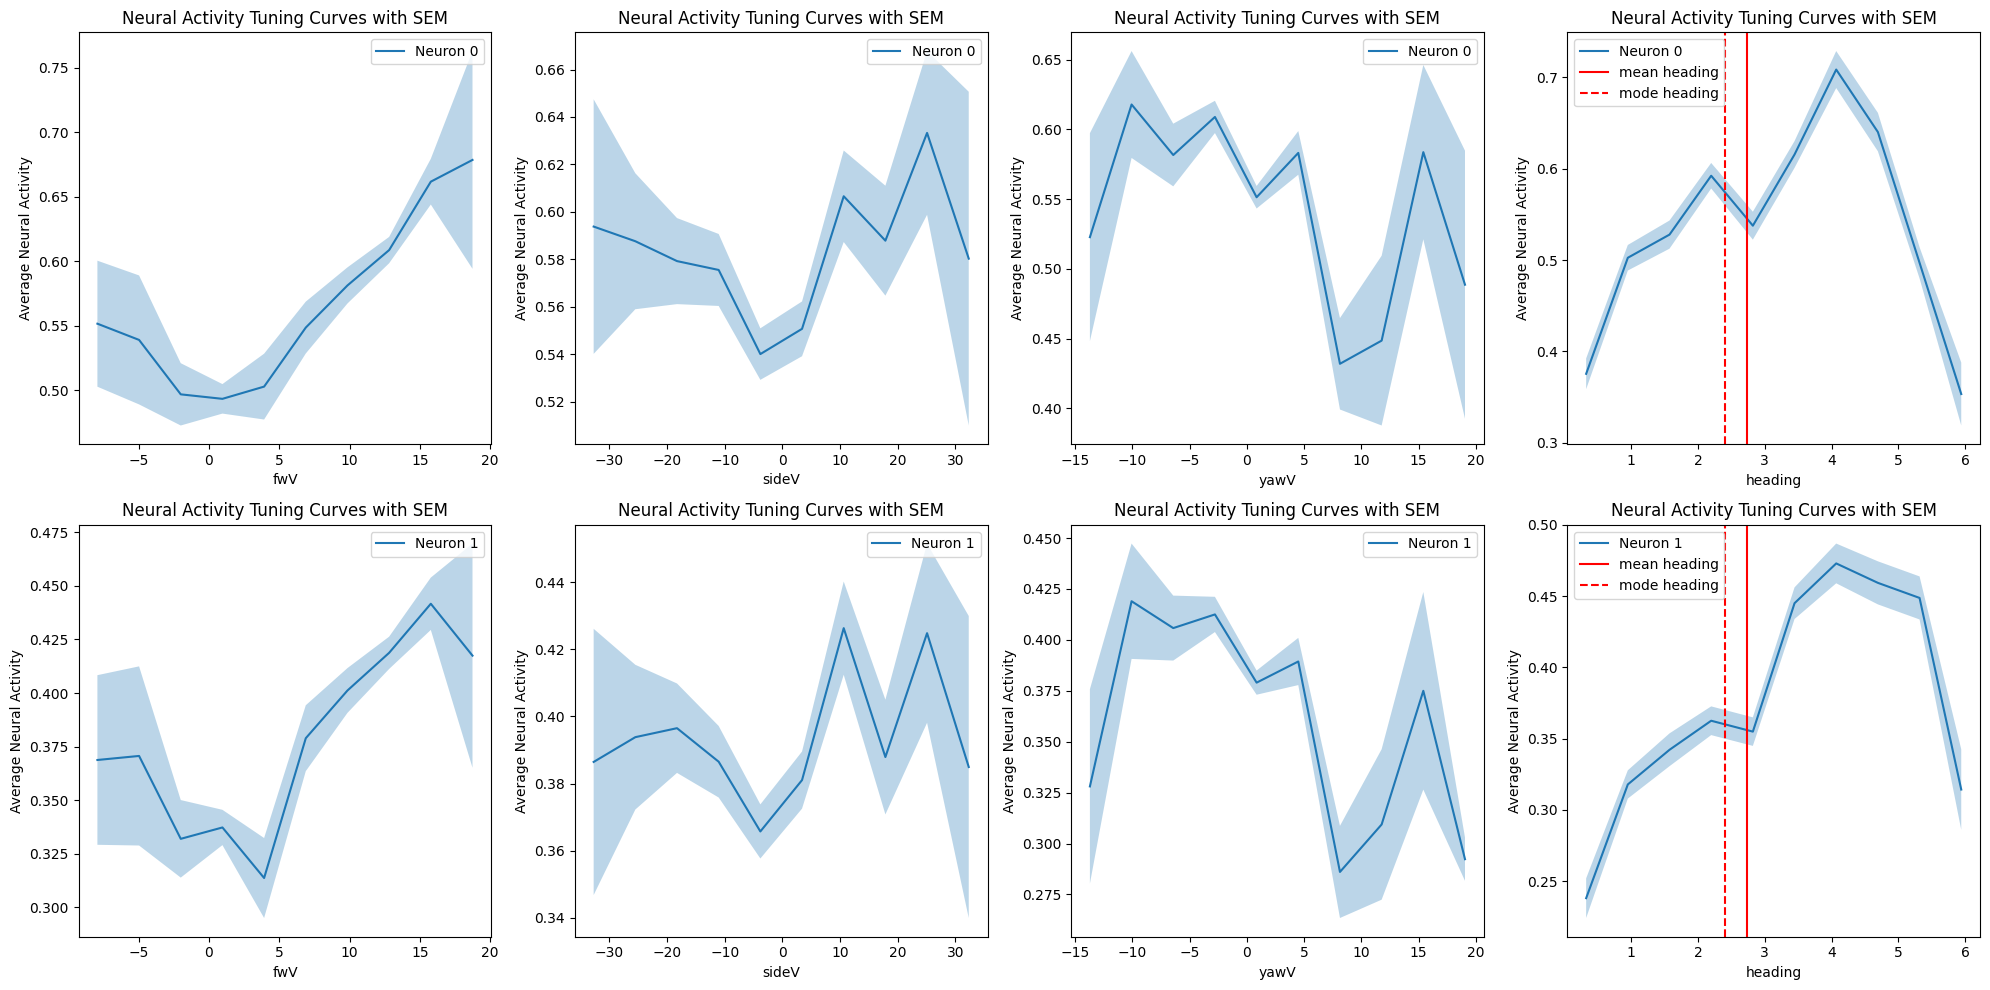

In [28]:
# Determine the number of rows and columns for the subplot grid
behavioral_variables = [behav_df.fwV, behav_df.sideV, behav_df.yawV, behav_df.heading]
filtered_behavior_variables = [filter_based_on_histogram(var, 0.5) for var in behavioral_variables]
neural_activity = np.array(neural_df[['FR1_CREL','FR1_CRER']].T)
num_bins = 10
neurons_to_plot = [0, 1]
fig, ax = plt.subplots(neural_activity.shape[0],len(filtered_behavior_variables),figsize=(len(filtered_behavior_variables)*5,neural_activity.shape[0]*5))
num_behavioral_variables = len(filtered_behavior_variables)
for j in neurons_to_plot:
    for i, behavior_variable in enumerate(filtered_behavior_variables):
        tuning_curve_1d(behavior_variable, neural_activity,[j],num_bins,ax=ax[j,i])
        if i == 3:
            ax[j,i].axvline(mean_angle, color = 'red', label = 'mean heading')
            ax[j,i].axvline(mode_angle, linestyle = '--',color = 'red', label = 'mode heading')
            ax[j,i].legend()
plt.tight_layout()
# Loop through behavioral variables and plot
#for i, behavior_variable in enumerate(filtered_behavior_variables):
    #tuning_curve_pop(num_bins, behavior_variable, neural_activity)


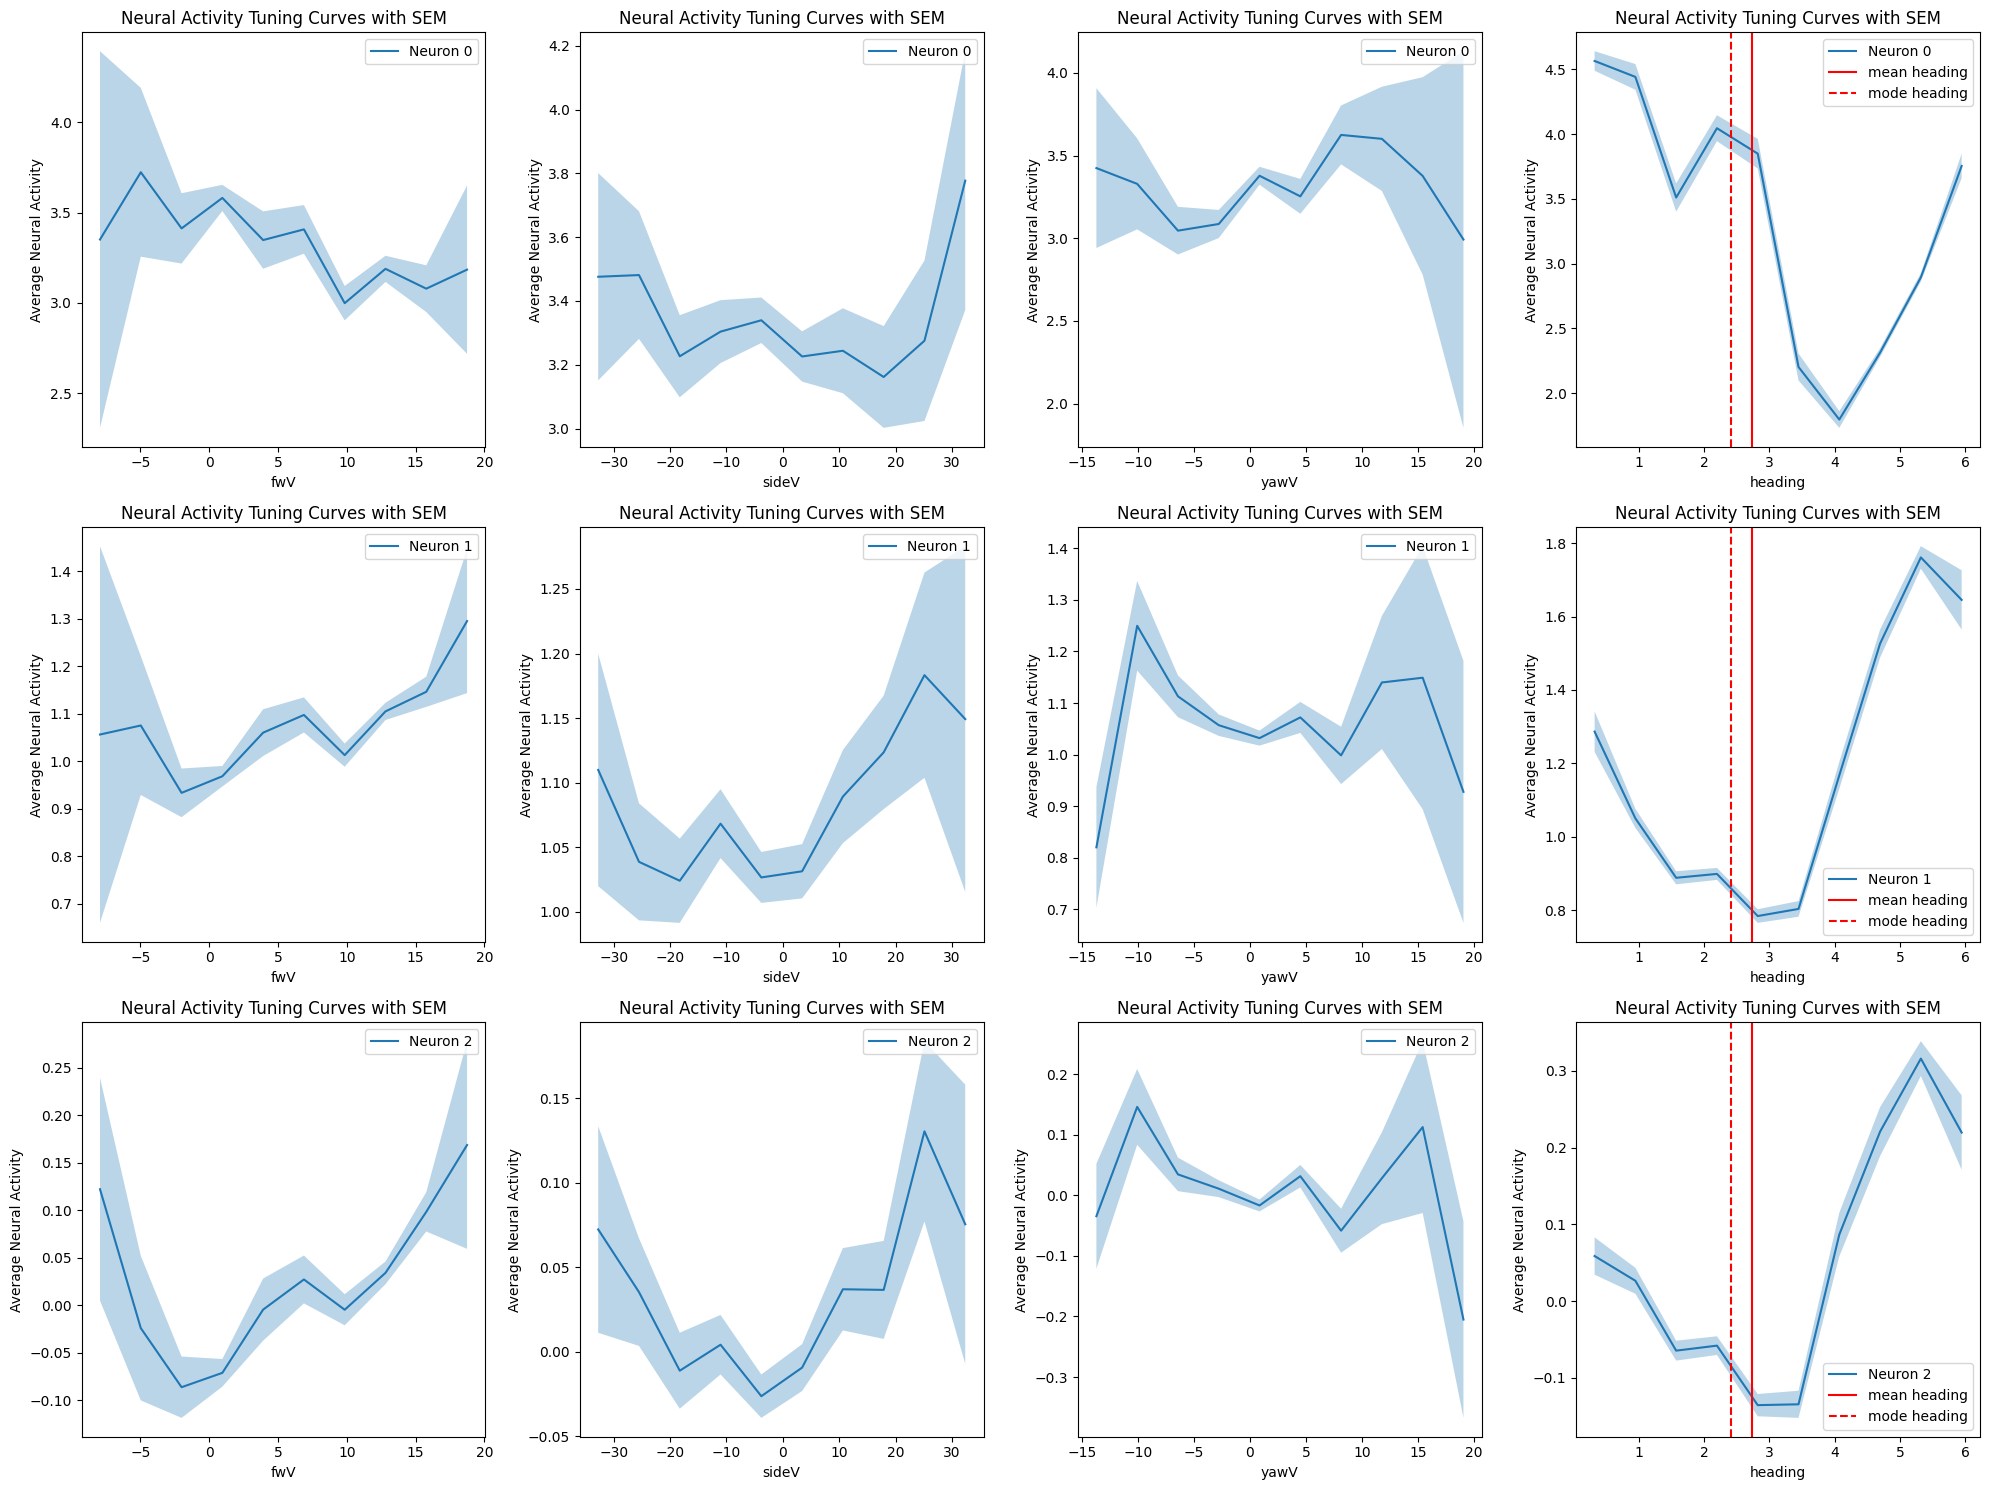

In [29]:
neurons_to_plot = [0,1,2]
neural_activity = np.array(param_df[['phase','amplitude','baseline']].T)
fig, ax = plt.subplots(3,4,figsize=(20,15))
for j in neurons_to_plot:
    for i, behavior_variable in enumerate(filtered_behavior_variables):
        tuning_curve_1d(behavior_variable, neural_activity,[j],num_bins,ax=ax[j,i])
        if i == 3:
            ax[j,i].axvline(mean_angle, color = 'red', label = 'mean heading')
            ax[j,i].axvline(mode_angle, linestyle = '--',color = 'red', label = 'mode heading')
            ax[j,i].legend()
plt.tight_layout()   


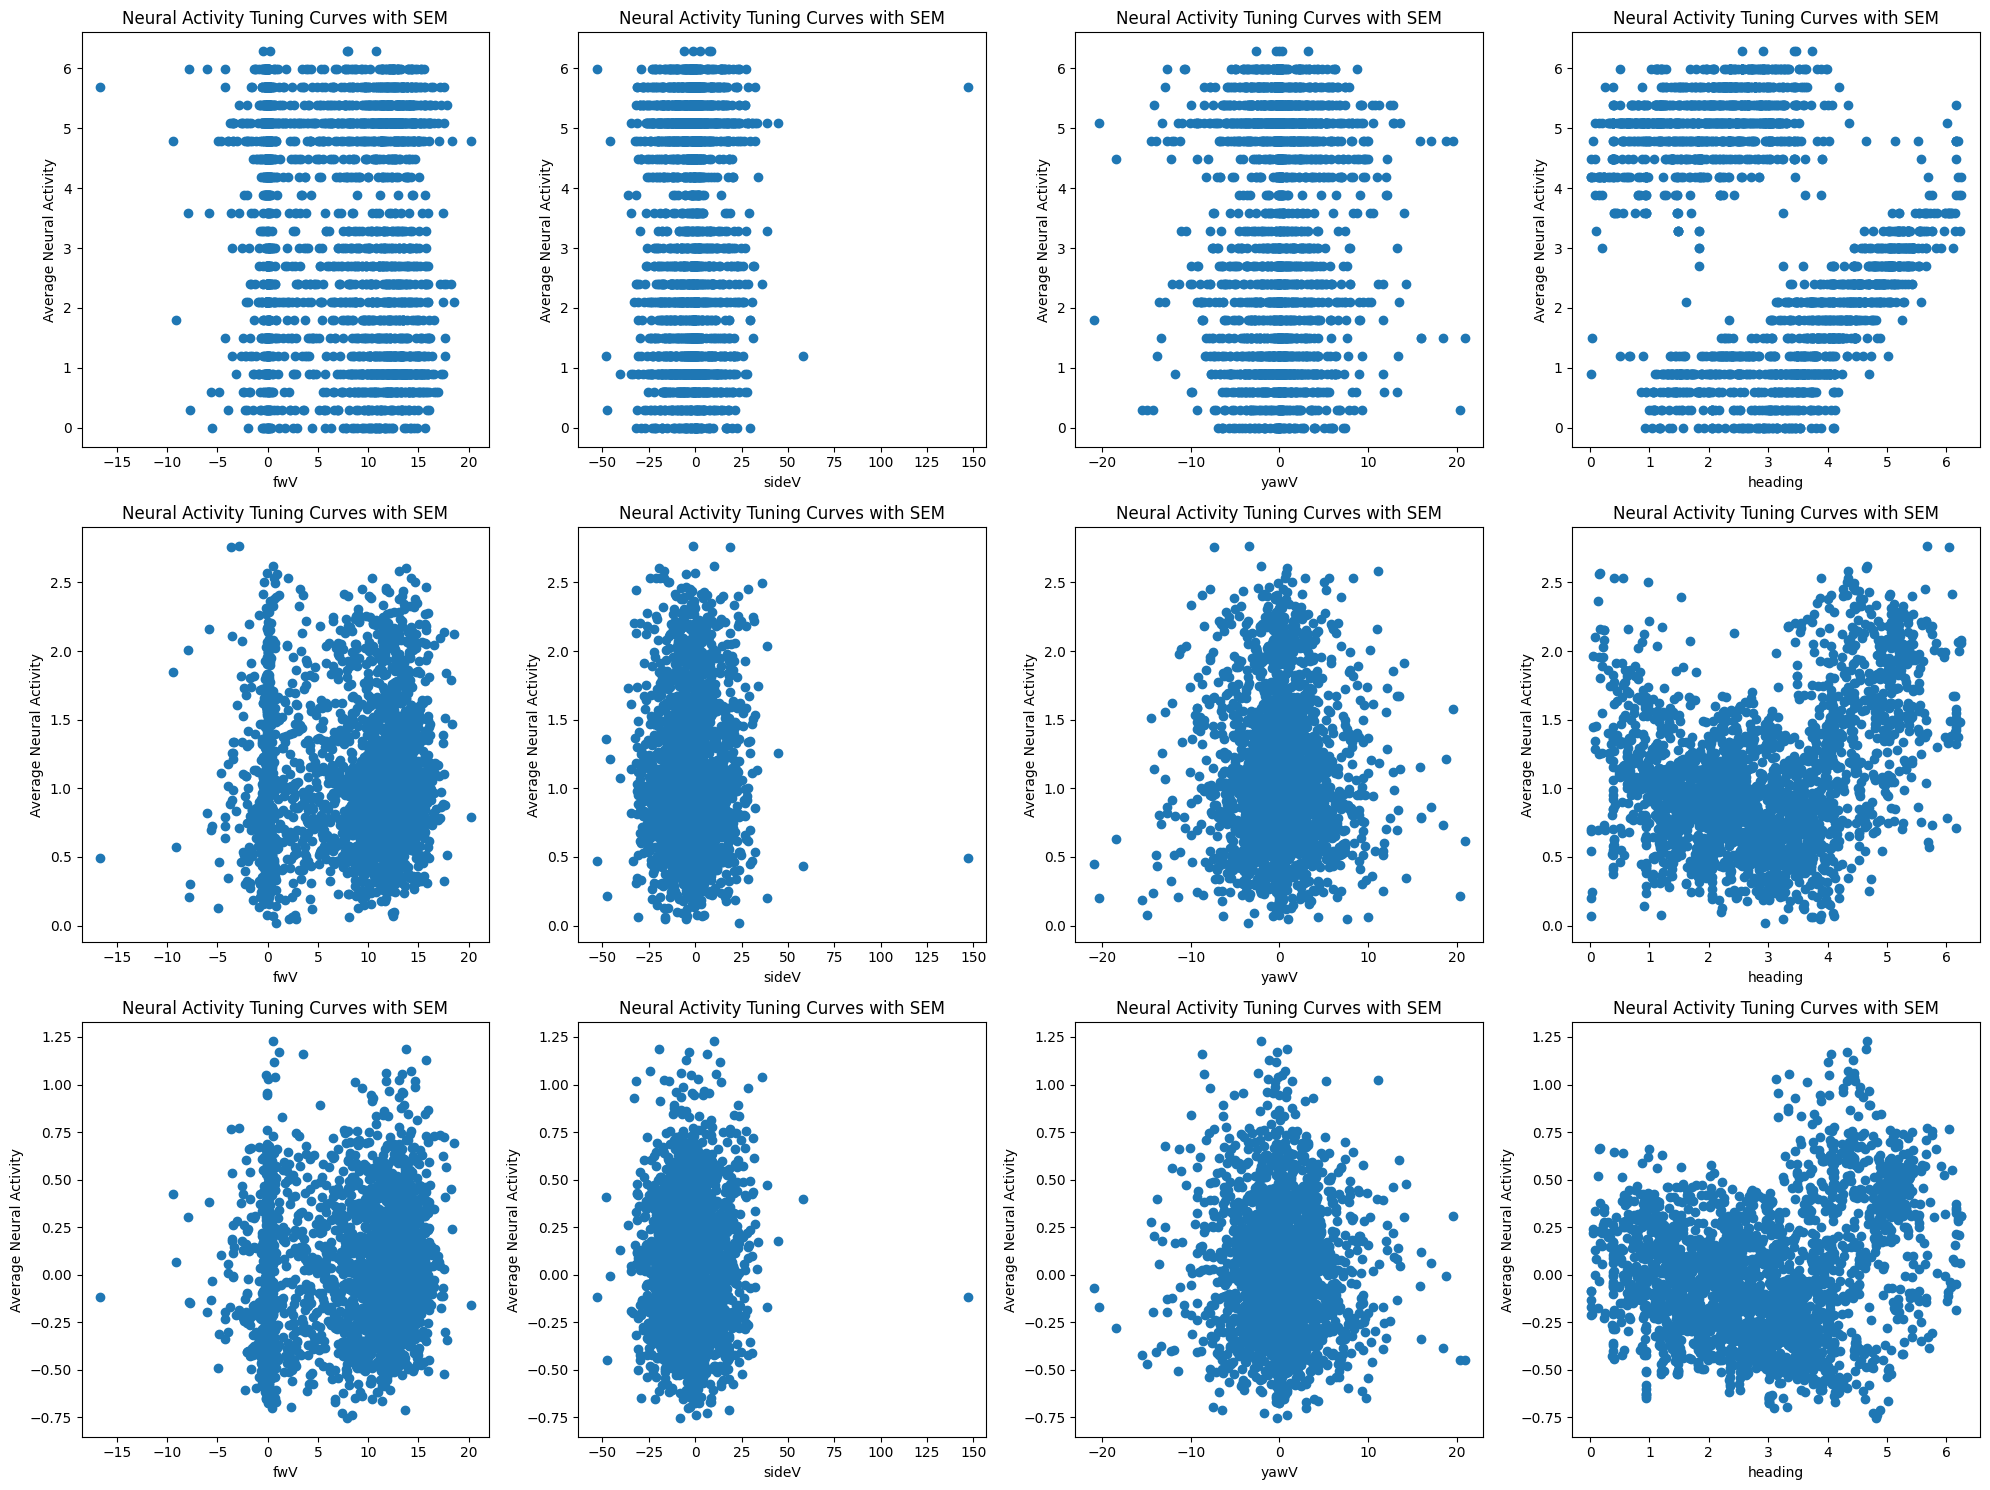

In [32]:
fig, ax = plt.subplots(3,4,figsize=(20,15))
for j in neurons_to_plot:
    for i, behavior_variable in enumerate(behavioral_variables):
        #print(len(behavior_variable))
        ax[j,i].scatter(behavior_variable,neural_activity[j,:])
        ax[j,i].set_xlabel(behavior_variable.name)
        ax[j,i].set_ylabel('Average Neural Activity')
        #ax[j,i].legend()
        ax[j,i].set_title('Neural Activity Tuning Curves with SEM')
plt.tight_layout()

## PCA

In [23]:
def perform_pca(selected_df, n_components=3):
    """
    Perform PCA on the given dataframe.

    Args:
    - data (pd.DataFrame): The dataframe containing neuron activity data.
    - n_components (int): The number of principal components to compute.

    Returns:
    - pca (PCA object): The PCA object after fitting the data.
    - transformed_data (np.array): Data transformed into principal components.
    - explained_variance_ratio (np.array): The amount of variance explained by each of the selected components.
    """
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(selected_df)

    # Perform PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_

    return pca, transformed_data, explained_variance_ratio
pca, transformed_data, explained_variance_ratio = perform_pca(selected_df,n_components=3)

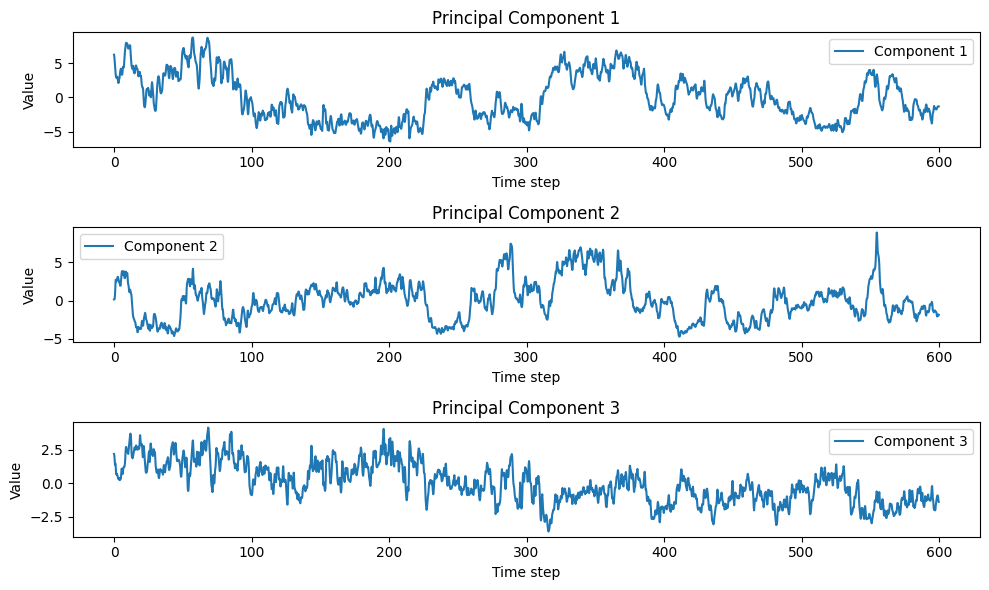

In [24]:
# visualze top PCstime_steps = range(transformed_data.shape[0])

n_components = 3
time_steps = range(transformed_data.shape[0])

# Create a figure with subplots
fig, axes = plt.subplots(n_components, 1, figsize=(10, 2*n_components))

for i in range(n_components):
    ax = axes[i]
    ax.plot(neural_df.time, transformed_data[:, i], label=f'Component {i+1}')
    ax.set_title(f'Principal Component {i+1}')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [25]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
phase = np.array(param_df.phase)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=5,
        color=phase,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Phase'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [26]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
amplitude = np.array(param_df.amplitude)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=5,
        color=amplitude,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Amplitude'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [27]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
baseline = np.array(param_df.baseline)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(
        size=4,
        color=baseline,  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Population Mean'),
        opacity=0.5
    )
)])

'''for idx in big_drop_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='red', width=2)))

for idx in big_increase_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='black', width=2)))'''    
# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [15]:
# Extract the first three PCs
pc1 = gaussian_filter1d(transformed_data[:, 0], sigma=10)
pc2 = gaussian_filter1d(transformed_data[:, 1],sigma=10)
pc3 = gaussian_filter1d(transformed_data[:, 2],sigma=10)

# Time steps for coloring
#lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
#upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
#color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
color_var = neural_df.time

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(size=5, color=color_var, colorscale='Viridis')
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


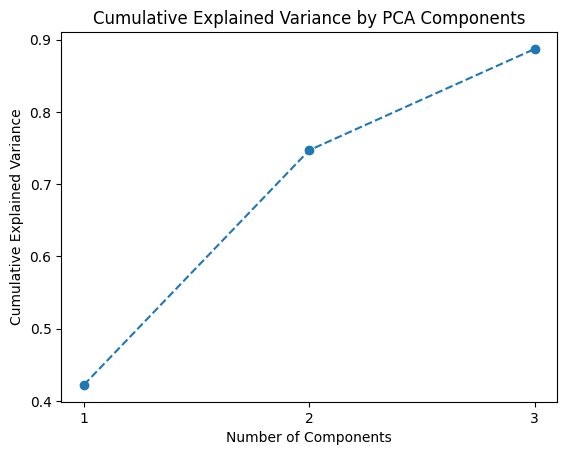

In [16]:
plt.plot(range(1, 4), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xticks(range(1, 4))
plt.show()

## Attempt 1: clustering (single behavioral var)

In [164]:
def perform_clustering(transformed_data, target_df, behavioral_variable, n_clusters=3):
    """
    Perform K-means clustering on combined neural PCs and a behavioral time series.

    Parameters:
    - neural_pcs: NumPy array or pandas DataFrame with the neural principal components.
    - behav_df: pandas DataFrame containing the behavioral time series.
    - behavioral_variable: string, the column name in behav_df for the behavioral time series.
    - n_clusters: int, the number of clusters to use in K-means.

    Returns:
    - Updates behav_df with a new column 'cluster_labels' containing the cluster labels.
    """
    
    # Ensure the behavioral variable is in the correct format and align lengths
    behavior_series = target_df[behavioral_variable].values.reshape(-1, 1)
    
    # Check if dimensions match
    if len(transformed_data) != len(behavior_series):
        raise ValueError("The lengths of neural PCs and behavioral data do not match.")
    
    # Combine neural PCs and behavioral variable
    combined_data = np.hstack((transformed_data, behavior_series))
    
    # Standardize the combined data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(combined_data)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(standardized_data)
    
    # Save cluster labels in behav_df
    target_df[behavioral_variable+'_labels'] = kmeans.labels_
    
    return target_df

# Example usage
# Assuming `neural_pcs` is your PCA components as a NumPy array or DataFrame
# and `behav_df` is your DataFrame with a column 'behavior_var' for the behavioral time series
perform_clustering(transformed_data, neural_df, 'MBON21R', n_clusters=7)

c:\Users\wilson\anaconda3\envs\2p_process\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,time,MBON21L,MBON21R,hDeltaB_0,hDeltaB_1,hDeltaB_2,hDeltaB_3,hDeltaB_4,hDeltaB_5,hDeltaB_6,...,hDeltaB_19,hDeltaB_20,hDeltaB_21,hDeltaB_22,hDeltaB_23,hDeltaB_24,hDeltaB_25,hDeltaB_26,hDeltaB_27,MBON21R_labels
0,0.000000,0.222773,0.264867,1.241962,0.383523,0.358444,0.097757,0.011519,0.277770,0.061169,...,2.185271,1.999191,2.162483,1.916930,1.971367,1.724920,1.422568,1.198348,1.322129,1
1,0.240513,0.209713,0.237666,1.122885,0.373910,0.261601,0.186200,0.079669,0.205932,0.085467,...,2.245278,2.006683,2.076988,1.878382,2.054740,1.769468,1.327635,1.199988,1.461048,1
2,0.481026,0.161754,0.212745,1.138844,0.295217,0.133648,0.338941,0.132484,0.163215,0.189639,...,2.262364,2.080175,2.052068,1.858321,2.050991,1.830000,1.274174,1.266786,1.564603,1
3,0.721539,0.086226,0.170872,1.136710,0.232473,0.008637,0.368918,0.121838,0.228631,0.317409,...,2.287551,2.155690,2.116092,1.876195,1.937832,1.814542,1.178010,1.355249,1.511653,1
4,0.962052,0.021611,0.116444,0.784412,0.284925,-0.013781,0.299948,0.062412,0.358765,0.385596,...,2.245671,2.199512,2.166246,1.901164,1.879810,1.712413,1.057092,1.345140,1.334321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,1799.036986,0.495776,0.447953,0.220035,-0.130434,0.015037,-0.042719,-0.123742,-0.077967,0.034825,...,2.692949,2.204068,1.894932,1.306142,1.125682,0.694187,0.191132,0.156214,0.164683,6
7481,1799.277499,0.477877,0.464794,0.021527,-0.090348,-0.056911,-0.082641,-0.201801,-0.158782,0.034147,...,2.674942,2.417434,2.100247,1.446980,1.464223,0.892807,0.474159,0.244738,0.307505,6
7482,1799.518012,0.477426,0.469343,-0.275158,-0.050738,-0.134345,-0.031096,-0.246961,-0.211673,-0.003561,...,2.660348,2.594776,2.300975,1.788475,1.732115,1.079645,0.681985,0.223644,0.445096,6
7483,1799.758525,0.468498,0.453946,-0.411082,-0.063065,-0.065458,0.032444,-0.249648,-0.194095,-0.061058,...,2.721088,2.683954,2.458006,2.080824,1.906719,1.199272,0.745784,0.225406,0.542416,1


In [165]:
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
#lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
#upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
#color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
color_var = neural_df.MBON21R_labels

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=color_var[::4],  # Set color to time steps
        colorscale='hot',  # Choose a color scale
        colorbar=dict(title='Cluster Label'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


## Behavior

In [145]:
imaging_behavior_functions.plot_fly_traj(behav_df.xPos,behav_df.yPos,behav_df,'odor',example_path_results,1)